In [33]:
import torch
import torch.nn as nn

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Multi-output ANN to categorize iris dataset
**goal**
Using the ANN model for multi-classification, where the model will predict the species of an iris flower based on its measurements of *sepal length*, *sepal width*, *petal length*, and *petal width* (4 inputs).
- There are 3 species of flower, *setosa*, *versicolor*, *verginica*.
<br>

**model architecture**
<br>
- This is a "fully connected" or "feed forward" network.
	- each node in layer n projects to each node in layer n+1
	- each connection has an individual trainable weight
	- *is not connected going backwards*
- The input layer accepts 4 values ( 1 for each measurement), and outputs 64 values into the next layer.
- The hidden layer has 64 units input from the previous layer and output to the next layer.
- The output layer has three outputs, each representing the probability for the three different iris species.
	- Each output unit will predict the probability for the data point belonging to an individual category.
- The final activation function used will be `softmax`. This is because there is more than one category. Using sigmoid would be invalid in this case.

In [34]:
# importing iris dataset (included in seaborn)
iris = sns.load_dataset('iris')

#iris.head() # used to see some data

***
### graphing
**graphing can be difficult** with *multidimensional* problems that exceed 3D. The iris dataset is a great example.
- `sns.pairplot` is a powerful function from the **seaborn** library that can produce plots of the distribution for individual pairs of data *features*.

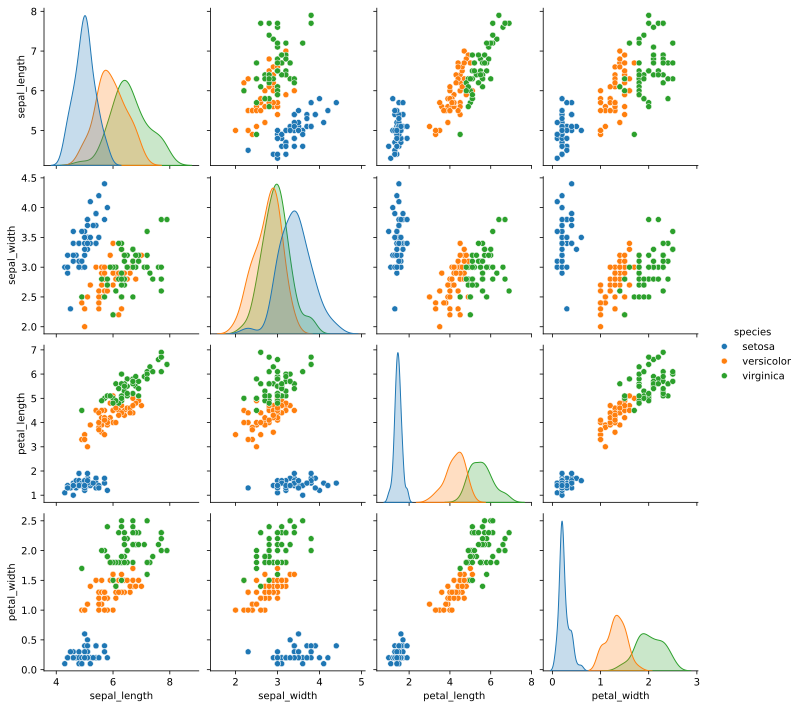

In [35]:
# graphing. Difficult since there are four dimensions.
sns.pairplot(iris, hue='species')
plt.show()

In [36]:
# re-structuring or transforming data

# converting from pandas dataframe to pytorch tensor
t_dataset= torch.tensor(iris[iris.columns[0:4]].values).float() # only use first 4 columns, because last column is outcome variable or datatype.

# numeric transformation - transforming species name to a number (0-2)
labels = torch.zeros(len(t_dataset), dtype=torch.long) # species 'setosa' will remain 0.
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [37]:
# building model
def ANN_cat_build(m_learing_rate=0.01):
    ANN_iris = nn.Sequential(
        nn.Linear(4,64), # input
        nn.ReLU(),       # non-linear activation
        nn.Linear(64,64),# hidden layer
        nn.ReLU(),       # non-linear activation
        nn.Linear(64,3)  # output
    )

    # loss function
    loss_func = nn.CrossEntropyLoss() # final activation layer, implements log softmax and NLLLoss

    # optimizer
    model_optimizer = torch.optim.SGD(ANN_iris.parameters(), lr=m_learing_rate)

    return ANN_iris, loss_func, model_optimizer

In [38]:
# training function

def ANN_classify_training(model, loss_function, m_optimizer, input_data, input_labels, epochs = 1000):
    
    # parameters
    losses = torch.zeros(epochs)
    aggregating_accuracy = []

    # training
    for epoch_IDX in range(epochs):
        # forward pass
        y_hat = model(input_data)

        # calculating loss
        loss = loss_function(y_hat, input_labels)
        losses[epoch_IDX] = loss

        # backprop
        m_optimizer.zero_grad()
        loss.backward()
        m_optimizer.step()

        # calculating accuracy at each epoch
        matches = torch.argmax(y_hat, axis=1) == input_labels # converting to booleans (T / F)
        matches_num = matches.float()                         # convert bools to ints (0 / 1)
        accuracy_percent = 100*torch.mean(matches_num)        # average of correct matches
        aggregating_accuracy.append(accuracy_percent)

    # final forward pass
    final_predictions = model(input_data)
    return final_predictions, losses, aggregating_accuracy, y_hat

#### What is this line really doing?
`matches = torch.argmax(y_hat, axis=1) == input_labels`

- the output of y_hat is a matrix with 3 columns and 150 rows (1 for each data point / flower)
        - each column represents categories (0, 1, 2)
    - the model will produce 3 outputs - a probability for the data point belonging to each category
        - the larger the probability, the more likely that the data point belongs to that category
- in each row, the `softmax` function will select the largest predicted probability

In [39]:
# running experiment

test_model, test_loss_func, test_optim = ANN_cat_build()

test_predictions, test_losses, test_accuracy, raw_model_output = ANN_classify_training(test_model, test_loss_func, test_optim, t_dataset, labels)

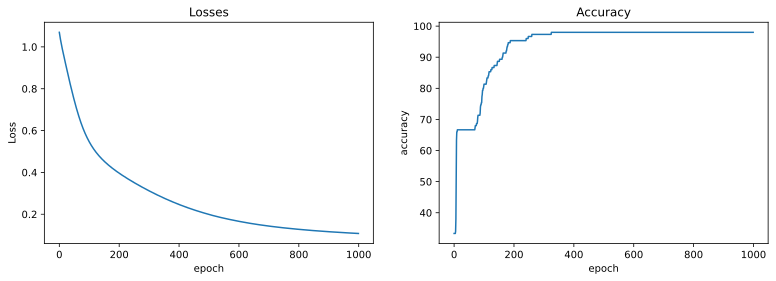

In [40]:
# plotting results

# accuracy
#print('Final accuracy: %g%%'%(test_accuracy))

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(test_losses.detach())
ax[0].set_title('Losses')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Loss')

ax[1].plot(test_accuracy)
ax[1].set_title('Accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')

plt.show()

***
#### Useful visualizations

**Visualization 1**
In statistics, probabilities should sum up to one.
`torch.sum(sm(raw_model_output), axis=1))` 
- this takes the sum at each row, of the values in each column
- each value seen below corresponds to one flower / data point
- `softmax` needs to be applied to the raw output before taking the sum
    - if softmax is not applied, then the resulting sum will not be 1.
    - this is because the incorrect probabilities would be included in the sum
<br>

**Visualization 2**
Plotting the raw model output for each 'stimulus' or set of weights.


In [41]:
# Visualization 1
sm = nn.Softmax(1)
print('Sum or probabilities across each column:\n',torch.sum(sm(raw_model_output), axis=1))

Sum or probabilities across each column:
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000

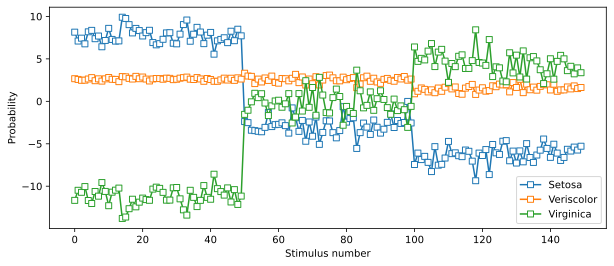

In [45]:
# Visualization 2

fig = plt.figure(figsize=(10,4))

plt.plot(raw_model_output.detach().numpy(), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['Setosa', 'Veriscolor', 'Virginica'])
plt.show()